# Missing Hosts

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy import table
from astropy.coordinates import SkyCoord
import astropy.units as u
import h5py
import os
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
import matplotlib
# matplotlib.rcParams['text.usetex'] = True


In [23]:
def get_z(scotchdir, classname):
    full_info = []
    for file in os.listdir(scotchdir+classname):        
        if "HEAD" in file:
            head = table.Table.read(scotchdir+'/'+classname+'/'+file, format='fits').to_pandas()
            full_info.append(head)
    full = pd.concat(full_info)
    # for col in full.columns:
    #     print(col)
    full = full[full['HOSTGAL_RA']==-999] # select the no-host events
    redshift = np.asarray(full['REDSHIFT_HELIO'])
    return redshift

In [59]:
scotchdir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH_Z3_V2/"
# input model you want to check here:
z_hostless  = get_z(scotchdir, "MLAG_SCOTCH_Z3_AGN20")


(array([3., 2., 2., 1., 1., 4., 0., 3., 0., 4.]),
 array([0.2314129 , 0.4776535 , 0.7238941 , 0.97013474, 1.2163754 ,
        1.462616  , 1.7088566 , 1.9550972 , 2.2013378 , 2.4475784 ,
        2.693819  ], dtype=float32),
 <BarContainer object of 10 artists>)

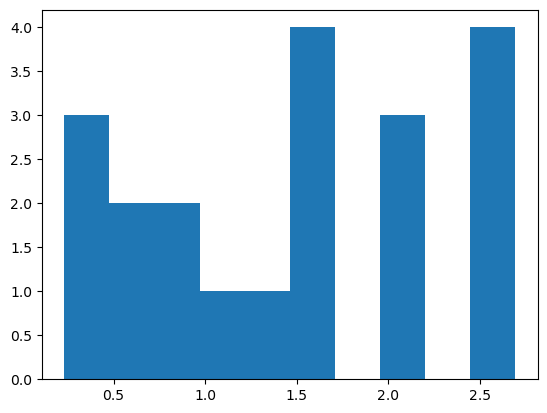

In [60]:
plt.hist(z_hostless)

In [61]:
print("There are {:d} events without hosts in this model.".format(len(z_hostless)))

There are 20 events without hosts in this model.


In [62]:
N_SCOTCH = 100000 # enter by hand: Table 2
print(len(z_hostless)/100000)

0.0002


In [63]:
# 3,000 in KN: 6%
# 1 in AGN01 ~0%
# 79594 for SN Ia : 8%
# 22 for TDE: ~0%
# 23999 for SN II-NMF: ~4%
# 3443 for SLSN-I: ~3%
# 4127 for SN-Iax: ~4%